In [18]:
import matplotlib.pyplot as plt
from MTM import TuringMachine

## 1.Task 

Because e I appreciate the power of copy-paste, I chose to approach the task of copying data.  More precisely, " Given a binary string an on tape "a" at the end of the program, the state on the tape will be "a__a".

## 2.Examples

"1000"->"1000__1000"

"1010"->"1010__1010"

"110101"->"11010__10101"

## 3.Description of touring machine

TM starts at the begging of the string. 

It will take the character and erase it  "_" and copy it once ahead of the string, and once behind, it will repeat it until the entire state is erased and cloned. 

In order to have a perfect copy-paste, we could come up with a program to translate the first string back with one spaces, but the time to do that is not proportional to the reword since this is just a school exercise.

Tutorial string: " 0 1 0 1 "  (<-left; right->)

Intitial state:  "_ *0* 1 0 1 _ "

 C1: decide witch element need tobe cloned 0 or 1
 
 <ul>
    <li>1 0 _ l 2</li>
    <li>1 1 _ l 3</li>
    <li>1 _ _ * H</li>
 </ul>
 after this step : " # _ 1 0 1 _ ".

 Steps to clone a 0: 
 
 C2: 
 <ul>
    <li>2 0 0 l 2</li>
    <li>2 1 1 l 2</li>
    <li>2 _ 0 r 4</li>
 </ul>
afer this step: "0 # 1 0 1 _ ".

 C4:
 <ul>
    <li>4 0 0 r 4</li>
    <li>4 1 1 r 4</li>
    <li>4 _ _ r 6</li>
 </ul>
afer this step: "0 _ *1* 0 1 _ ".

C6:
 <ul>
    <li>6 0 0 r 6</li>
    <li>6 1 1 r 6</li>
    <li>6 _ _ r 8</li>
 </ul> 
 afer this step: "0 _ 1 0 1 _ # ".
 
 C8:
 <ul>
    <li>8 0 0 r 8</li>
    <li>8 1 1 r 8</li>
    <li>8 _ 0 l 10</li>
 </ul> 
 afer this step: "0 _ 1 0 1 # 0 ".

Go to the original string:

C10:
 <ul>
    <li>10 0 0 l 10</li>
    <li>10 1 1 l 10</li>
    <li>10 _ _ l 0</li> # now we reach the original string
 </ul> 
 afer this step: "0 _ 1 0 *1* _ 0 ".
 
 Go to the first remining character of the original string
 
 C0:
 <ul>
    <li>0 0 0 l 0</li>
    <li>0 1 1 l 0</li>
    <li>0 _ _ r 1</li> # now we reach the original string
 </ul> 
 afer this step: "0 _ *1* 0 1 _ 0 ".

Steps to go back to the new first caracter from the numer. In this case it will be 1: "0 _ *1* 0 1 _ 0 ".

C1: "0 # _ 0 1 _ 0 "

Steps to clone a 1: 
 
 C3: 
 <ul>
    <li>3 0 0 l 3</li>
    <li>3 1 1 l 3</li>
    <li>3 _ 1 r 5</li>
 </ul>
afer this step: "0 1 # 0 1 _ 0 ".

 C5:
 <ul>
    <li>5 0 0 r 5</li>
    <li>5 1 1 r 5</li>
    <li>5 _ _ r 7</li>
 </ul>
afer this step: "0 1 _ *0* 1 _ 0 ".

C7:
 <ul>
    <li>7 0 0 r 7</li>
    <li>7 1 1 r 7</li>
    <li>7 _ _ r 9</li>
 </ul> 
afer this step: "0 1 _ 0 1 _ *0* ".
 
 C9:
 <ul>
    <li>9 0 0 r 9</li>
    <li>9 1 1 r 9</li>
    <li>9 _ 1 l 10</li>
 </ul> 
 afer this step: "0 1 _ 0 1 _ *0* 1 ".


## 4.Complexity

l^2-> where l is the length of the string 

C = (2+l+l+2+1)*l+3 = (2l+5)*l+3 # for l>0

where l is the length of the string

## 5.Working example

In [36]:
N = 100 # tape length, initialize to a large value if you need it
input = ['_10110110_']
program = open('hw_program.txt').read()
tm = TuringMachine(program, input,[N],)
history = tm.run()
'_10110110__10110110_'
tm.tapes

['__________________________________________________10110110__10110110__________________________________________']

## Complexity check

In [55]:
N = 500 # tape length, initialize to a large value if you need it

hisory_lengths = []
s=""
for _ in range(100):
    
    input = [""+s+"_"]
    program = open('hw_program.txt').read()
    tm = TuringMachine(program, input,[N],)
    history = tm.run(max_iter=9999*100)
    print(tm.tapes)
    s=s+"1"
    hisory_lengths.append(len(history))

['_____________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________']

['_________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________1__1______________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

['_________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________111111111111111111111111111111__111111111111111111111111111111____________________________________________________________________________________________________________________________________________________________________________________________________________________________']

['_________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________1111111111111111111111111111111__1111111111111111111111111111111____________________________________________________________________________________________________________________________________________________

['_________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________1111111111111111111111111111111111111111111111__1111111111111111111111111111111111111111111111____________________________________________________________________________________________________________________________________________________________________________________________________________']

['_________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________11111111111111111111111111111111111111111111111__11111111111111111111111111111111111111111111111____________________________________________________________________________________________________

['_________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________1111111111111111111111111111111111111111111111111111111111111__1111111111111111111111111111111111111111111111111111111111111_____________________________________________________________________________________________________________________________________________________________________________________________']

['_________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________11111111111111111111111111111111111111111111111111111111111111__11111111111111111111111111111111111111111111111111111111111111_______________________________________________________

['_________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________11111111111111111111111111111111111111111111111111111111111111111111111111111__11111111111111111111111111111111111111111111111111111111111111111111111111111_____________________________________________________________________________________________________________________________________________________________________________']

['_________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________111111111111111111111111111111111111111111111111111111111111111111111111111111__111111111111111111111111111111111111111111111111111111111111111111111111111111_______

['_________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________1111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111__1111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111_______________________________________________________________________________________________________________________________________________________________']

['_________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________11111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111__111111111111111111111111111111111111111111111111111111111

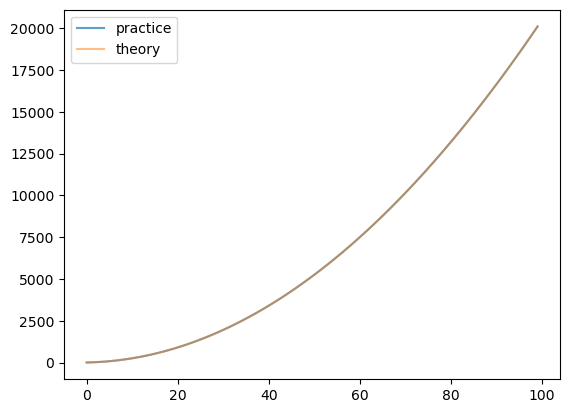

In [89]:
plt.plot(hisory_lengths, alpha=0.7, label="practice")
plt.plot([ ((2*l+5)*l)+3 for l in range(100)], alpha =0.5, label="theory")
plt.legend()
